Классификация: является ли мошенничеством, да/нет

# Подготовка

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('DataSet2_1.csv', sep = "|")
data = data.dropna()

In [ ]:
data

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(data, stratify = data["fraud"])

In [ ]:
X = data_train.drop(columns=['fraud'])
y = data_train['fraud']
X_test = data_test.drop(columns=['fraud'])
y_test = data_test['fraud']

# Logreg


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear")

logreg.fit(X, y)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logreg_labels, logreg_predictions = y_test, logreg.predict(X_test)
print(accuracy_score(logreg_labels, logreg_predictions))
print(precision_score(logreg_labels, logreg_predictions))
print(recall_score(logreg_labels, logreg_predictions))
print(f1_score(logreg_labels, logreg_predictions))

0.9680851063829787
0.8235294117647058
0.5384615384615384
0.6511627906976744


# SVM

In [ ]:
from sklearn import svm

SVMmodel = svm.SVC(kernel="linear")

SVMmodel.fit(X, y)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
SVMlabels, SVMpredictions = y_test, SVMmodel.predict(X_test)
print(accuracy_score(SVMlabels, SVMpredictions))
print(precision_score(SVMlabels, SVMpredictions))
print(recall_score(SVMlabels, SVMpredictions))
print(f1_score(SVMlabels, SVMpredictions))

0.9723404255319149
0.9333333333333333
0.5384615384615384
0.6829268292682926


# Decision tree

In [ ]:
from sklearn import tree

DTmodel = tree.DecisionTreeClassifier()

DTmodel.fit(X,y)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
DTlabels, DTpredictions = y_test, DTmodel.predict(X_test)
print(accuracy_score(DTlabels, DTpredictions))
print(precision_score(DTlabels, DTpredictions))
print(recall_score(DTlabels, DTpredictions))
print(f1_score(DTlabels, DTpredictions))

0.9553191489361702
0.6190476190476191
0.5
0.5531914893617021


# Метрики

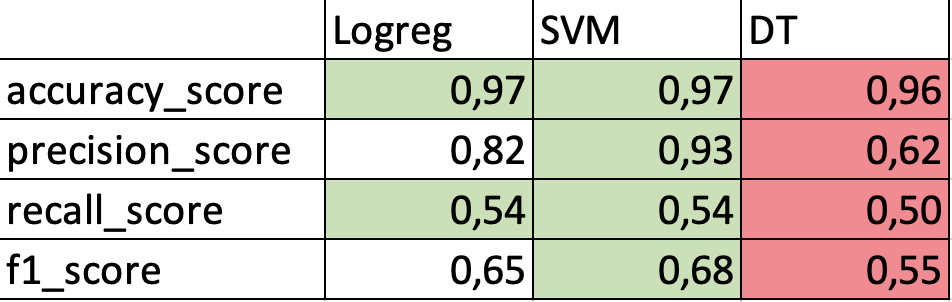

Чем ближе к 1 тем лучше, чем ближе к 0 тем хуже



*   **accuracy_score** - доля объектов, для которых мы правильно предсказали класс
*   **precision_score** - доля правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом
*   **recall_score** - доля правильно найденных положительных объектов среди всех объектов положительного класса
*   **f1_score** - среднее гармоническое precision и recall




# Кривые


## Roc curve

* **TPR (true positive rate)** – доля положительных объектов, правильно предсказанных положительными.
* **FPR (false positive rate)** – это доля отрицательных объектов, неправильно предсказанных положительными.

* **ROC-кривая** - кривая в осях TPR/FPR, которая получается при варьировании порога отсечения.
* **AUC (area under curve)** - площадь под ROC-кривой. Чем больше тем лучше классификатор разделяет два класса.

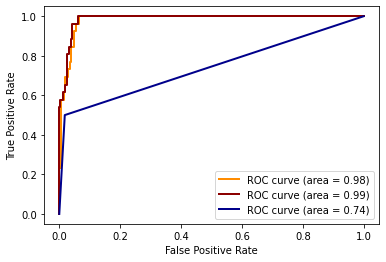

In [ ]:
from sklearn.metrics import roc_curve, auc

lp = logreg.predict_proba(X_test)
fprL, tprL, thresholdsL = roc_curve(logreg_labels, lp[:,1])
roc_aucL = auc(fprL, tprL)

svmp = SVMmodel.decision_function(X_test)
fprS, tprS, thresholdsS = roc_curve(SVMlabels, svmp)
roc_aucS = auc(fprS, tprS)

dtp = DTmodel.predict_proba(X_test)
fprD, tprD, thresholdsD = roc_curve(DTlabels, dtp[:,1])
roc_aucD = auc(fprD, tprD)

plt.figure()
lw = 2

plt.plot(
    fprL,
    tprL,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_aucL,
)

plt.plot(
    fprS,
    tprS,
    color="darkred",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_aucS,
)

plt.plot(
    fprD,
    tprD,
    color="darkblue",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_aucD,
)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



* Оранжевый - logreg
* Красный - SVM
* Синий - дерево



Чем больше кривая охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям.

## PR curve

* **AP (Average Precision)** - показатель эфффективности, среднее значение точности. Равно площади под кривой точность-полнота. Чем ближе к 1, тем лучше.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

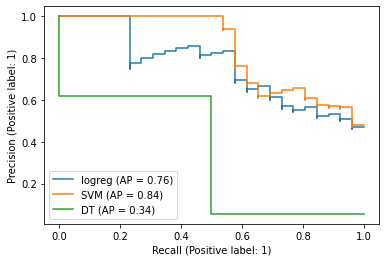

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
ax = plt.subplot()
plot_precision_recall_curve(logreg, X_test, y_test, name="logreg",ax=ax)
plot_precision_recall_curve(SVMmodel, X_test, y_test, name="SVM",ax=ax)
plot_precision_recall_curve(DTmodel, X_test, y_test, name="DT",ax=ax)


Выборка несбалансирована поэтому меньше 0,5